In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [12]:
df_pyglet = pd.read_csv("pyglet_results.csv")
print(df_pyglet.shape)
df_sensor = pd.read_csv("sensor_results.csv")
print(df_sensor.shape)

(51, 2)
(51, 2)


In [13]:
df_sensor['timestamp_diff'] = df_sensor['timestamp'].diff()
df_sensor

,timestamp,value,timestamp_diff
0,2947.766149,1,NaN
1,2947.865879,0,0.099731
2,2947.965628,1,0.099748
3,2948.065364,0,0.099736
4,2948.165130,1,0.099767
5,2948.264862,0,0.099732
6,2948.364609,1,0.099747
7,2948.463809,0,0.099200
8,2949.565868,1,1.102060
9,2949.680556,0,0.114688


In [15]:
# Start from first pause to sync
first_pause = df_pyglet['timestamp'][df_pyglet['timestamp'].diff() > 0.5].values[0]
df_pyglet = df_pyglet[df_pyglet['timestamp'] >= first_pause]
df_sensor = df_sensor[df_sensor['timestamp'] >= first_pause]

# Ignore sensor results after last pyglet timestamp
last_pyglet = df_pyglet['timestamp'].values[-1]
df_sensor = df_sensor[df_sensor['timestamp'] <= last_pyglet]

In [16]:
# Interactive
%matplotlib qt

first_pause = df_pyglet['timestamp'][df_pyglet['timestamp'].diff() > 0.5].values[0]
plt.plot(df_pyglet['timestamp'], df_pyglet['value'], label='Pyglet')
plt.plot(df_sensor['timestamp'], df_sensor['value'], label='Sensor', marker='x')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

<Axes: >

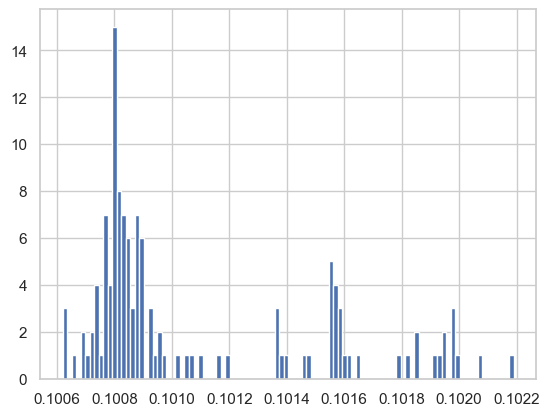

In [7]:
%matplotlib inline

df_pyglet['timestamp_diff'] = df_pyglet['timestamp'].diff().fillna(0)
df_pyglet['timestamp_diff'][df_pyglet['timestamp_diff'] < 0.5].iloc[1:].hist(bins=100)

In [17]:
df_sensor.shape

(30, 3)

<Axes: >

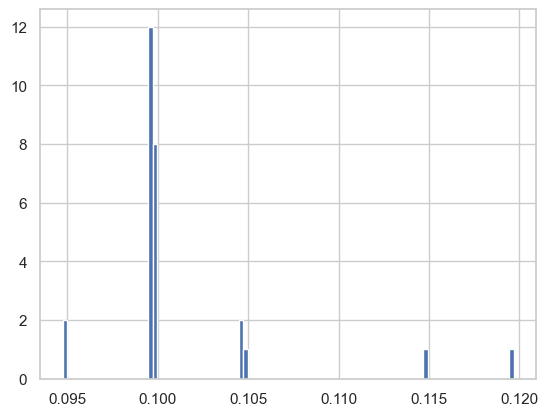

In [18]:
%matplotlib inline

df_sensor['timestamp_diff'] = df_sensor['timestamp'].diff().fillna(0)
df_sensor['timestamp_diff'][df_sensor['timestamp_diff'] < 1].iloc[1:].hist(bins=100)

In [19]:
df_sensor[df_sensor['timestamp_diff'] < 0.1]

,timestamp,value,timestamp_diff
18,2951.585461,1,0.000000
19,2951.680215,0,0.094754
21,2951.884664,0,0.099734
22,2951.984397,1,0.099733
24,2952.198873,1,0.099746
25,2952.298569,0,0.099697
26,2952.398288,1,0.099719
27,2952.498022,0,0.099734
29,2953.699810,0,0.099728
30,2953.799562,1,0.099752
